## FINANCIAL DATA

MODULE 3 | LESSON 2


---

# DISPLAYING EFFECTS OF DIVERSIFICATION IN A PORTFOLIO

|  |  |
|:---|:---|
|**Reading Time** |  40 minutes |
|**Prior Knowledge** | Stock Return Calculations, Variance, Standard Deviation  |
|**Keywords** | Variance - Correlation relationship, Covariance |

---

*In the previous lesson, we focused on comparing returns and volatilities of multiple assets. In this lesson, we focus further on how we can reduce volatility in our portfolio and the variables that have an impact on this*

In [9]:
import datetime

import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
from IPython.display import VimeoVideo

## 1. Diversification
Diversification is an extremely important investing concept. It's the belief that you can reduce risk by spreading your capital across multiple investments, not just one. This can be multiple stocks, multiple asset classes, etc. The key is that you spread your wealth or, don't put all your eggs in one basket. Later in this lesson, we will discuss how we can optimize the diversification of our portfolio. For now, we will illustrate why it is so important.

We will use a practical example. Let's say the year is 2016 and you have inherited some wealth from a family member and are looking for where to put it. You were told by a family friend that you should spread out this money and not just put it into the same type of asset so you decide to buy 100 shares of JP Morgan (JPM) and 5 Bitcoin. Let's pull the data and calculate the returns of each along with the returns of our portfolio 

In [10]:
start = datetime.date(2016, 11, 29)
end = datetime.date(2021, 11, 28)
# start = datetime.date.today()-datetime.timedelta(365*10)
# end = datetime.date.today()
prices = web.DataReader(["JPM", "BTC-USD"], "yahoo", start, end)["Adj Close"]
prices = prices.rename(columns={"BTC-USD": "BTC"})
prices = prices.dropna()
returns = prices.pct_change()

In [11]:
# observe data
returns.head()

Symbols,JPM,BTC
Date,,
2016-11-29,NaN,NaN
2016-11-30,0.015839,0.013713
2016-12-01,0.020207,0.014863
2016-12-02,-0.002323,0.027974
2016-12-05,0.020343,-0.024737


### 1.1 Determine Initial Investment

In [12]:
# Determine weights
initialJPM = prices.JPM[0] * 100
initialBTC = prices.BTC[0] * 5
initialInvestment = initialJPM + initialBTC

In [13]:
weightJPM = initialJPM / (initialBTC + initialJPM)
weightBTC = 1 - weightJPM
print(
    "This would make the weights %.3f and %.3f for JPM and BTC respectively"
    % (weightJPM, weightBTC)
)

This would make the weights 0.647 and 0.353 for JPM and BTC respectively


### 1.2 Calculate Portfolio Daily Returns

We will use the existing weights we just calculated, but to make things simpler, we are going to assume a $10,000 investment in each of these assets along with our portfolio so that we can compare returns. In order to see the daily change in our portfolio, we need to add 1 to each return and then multiply each subsequent return by our previous position.

For example, in our portfolio below our first two returns are 0.015 and 0.018. 
We add one to these to get 1.015 and 1.018. 

Then, with our starting position of \\$10,000,  to get the portfolio value after one day we multiply 
\\$10,000 * 1.015 = \\$10,150. 

To get the portfolio value after the next day, we multiply \\$10,150 * 1.018 = \\$10,332.7

Let's apply the above logic to the last 5 years of data:

In [14]:
returns["Portfolio"] = (returns.JPM * weightJPM) + (returns.BTC * weightBTC)
returns = returns + 1
returns.head()

Symbols,JPM,BTC,Portfolio
Date,,,
2016-11-29,NaN,NaN,NaN
2016-11-30,1.015839,1.013713,1.015088
2016-12-01,1.020207,1.014863,1.018319
2016-12-02,0.997677,1.027974,1.008379
2016-12-05,1.020343,0.975263,1.004420


In [15]:
returns.iloc[0] = 10000
returns.head()

Symbols,JPM,BTC,Portfolio
Date,,,
2016-11-29,10000.000000,10000.000000,10000.000000
2016-11-30,1.015839,1.013713,1.015088
2016-12-01,1.020207,1.014863,1.018319
2016-12-02,0.997677,1.027974,1.008379
2016-12-05,1.020343,0.975263,1.004420


In [16]:
returns.cumprod()

Symbols,JPM,BTC,Portfolio
Date,,,
2016-11-29,10000.000000,10000.000000,10000.000000
2016-11-30,10158.390494,10137.125071,10150.878933
2016-12-01,10363.659309,10287.790480,10336.834285
2016-12-02,10339.582341,10575.580959,10423.442824
2016-12-05,10549.924165,10313.973390,10469.511242
...,...,...,...
2021-11-19,23370.825416,790093.281390,116863.162869
2021-11-22,23868.974980,765211.836309,117174.267985
2021-11-23,24439.737228,782609.582235,119927.482487


In [17]:
portValues = returns.cumprod()
portValues["Date"] = portValues.index

We can chart the two assets we've invested in along with the value of our portfolio. First, we need to get the data into a more usable format for seaborn's `lineplot` method. We use the pandas `melt` method to make our table more horizontal:

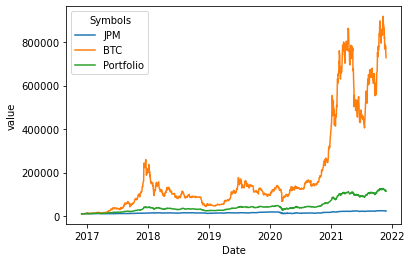

In [18]:
sns.lineplot(x="Date", y="value", hue="Symbols", data=portValues.melt(id_vars=["Date"]));

We can see in the above chart that our portfolio wouldn't have gained as much as our highest returning asset, Bitcoin, but it seems as if the peaks and valleys of the chart are reduced a bit by investing in more than one asset.

### 1.3 Quantifying Diversification Benefits
How do you think we can measure how volatile our stocks are compared to our portfolio? One simple way is to take the standard deviation of the returns and compare it to the standard deviation of our portfolio returns. 

In [19]:
returns.drop(index=returns.index[0], axis=0, inplace=True)
returns = returns - 1
returns.head()

Symbols,JPM,BTC,Portfolio
Date,,,
2016-11-30,0.015839,0.013713,0.015088
2016-12-01,0.020207,0.014863,0.018319
2016-12-02,-0.002323,0.027974,0.008379
2016-12-05,0.020343,-0.024737,0.004420
2016-12-06,0.005165,0.007281,0.005912


In [20]:
returns.std().round(3)

Symbols
JPM          0.019
BTC          0.049
Portfolio    0.023
dtype: float64

We can see from the standard deviations above that even though Bitcoin had the highest returns, it also had the highest standard deviation of returns by a significant margin. Herein lies one of the major benefits of diversification: by investing in multiple assets, we are able to reduce the volatility of our portfolio. It's not less than JP Morgan's standard deviation, but it is much closer to that than the high end, which is Bitcoin. In most cases, the more assets we invest in, the more we can reduce our risk or standard deviation

If we are managing a client's account and their first objective is to reduce risk, how do you think we can identify assets to do this effectively and efficiently?

In the first video of this lesson, we recap what we've learned so far regarding the benefits of diversification and how we can quantify this.


In [21]:
VimeoVideo("706655791", h="668198086a", width=600)

##### [Access video transcript here](https://drive.google.com/file/d/1MrBC8e7yIG5YVHcicLBsukkrCOnErrLj/view?usp=sharing)

## 2. Managing Portfolio Variance
### 2.1 Portfolio Variance Formula
In order to try to minimize portfolio variance, a good starting point is the formula itself to calculate variance with a two-asset portfolio.


$\textrm{Portfolio Variance} = w_x^2 \sigma_x^2 + w_y^2 \sigma_y^2 + 2w_x w_y Cov_{x,y}$

where

* $w_x$ = portfolio weight of asset x
* $w_y$ = portfolio weight of asset y
* $\sigma_x$ = standard deviation of asset x
* $\sigma_y$ = standard deviation of asset y
* $Cov_{x,y}$ = Covariance of the two assets

Also, building off the previous lesson this means that

$\textrm{Portfolio Standard Deviation} = \sqrt{\textrm{Portfolio Variance}}$



With this information in mind, there are 3 things we can do to minimize variance.
1. We can pick assets with lower standard deviations of returns. This may seem obvious, but if we really want to reduce the variance of our portfolio, the simplest thing to do is just pick assets that have relatively low volatilities. 
2. Invest a higher percentage of your portfolio into your less risky asset(s). For our previous example with JPM and Bitcoin, we could further reduce our portfolio variance by investing a bigger portion of our funds into JPM since it had a lower standard deviation than Bitcoin. 

Sometimes, it's the case that an investor may still want to invest in a riskier asset like Bitcoin. This brings us to the third thing we can do to reduce variance.

3. Check for assets with a low covariance. If you look at the right side of our portfolio variance function, you'll notice we have the covariance of two assets as a function parameter. If we can reduce that, we can reduce the overall variance of our portfolio. 

This is an important point and should be expanded upon further.


### 2.2 Covariance-Correlation Relationship
If you recall from a previous lesson, the formula for correlation is:

$\rho_{x,y} = \frac{Cov_{x,y}}{\sigma_x*\sigma_y}$

We can rearrange this to get the covariance formula:

$Cov_{x,y} = \rho_{x,y}\sigma_x\sigma_y$

Then, we can plug this back into our portfolio variance formula:

$\textrm{Portfolio Variance} = w_x^2 \sigma_x^2 + w_y^2 \sigma_y^2 + 2w_x w_y \rho_{x,y}\sigma_x\sigma_y$


These formulas are basically to show that we need to minimize correlations in order to minimize portfolio variance. Owning uncorrelated assets illustrates the efficient benefits of diversification. Let's write some reusable functions to sum up the work we did above and really display how this works with a few examples 

#### 2.2.1 Writing Functions - Reusable Code
A common tenet in programming is to wrap any code you're going to need to use multiple times into a function. In our case, we've needed to calculate daily returns over a date range many times throughout this course. We will wrap the core code for this into a function called `getReturns`.

`getReturns` takes 3 arguments:
* `startTime` - `datetime`
* `endTime` - `datetime`
* `tickers` - dict of values where key is the yahoo ticker for a security and values are the displayed names in the output

In [22]:
def getReturns(startTime, endTime, tickers):
    # pull price data from yahoo -- (list(tickers.keys())) = ['^GSPC','^RUT']
    prices = web.DataReader(list(tickers.keys()), "yahoo", startTime, endTime)[
        "Adj Close"
    ]
    prices = prices.rename(columns=tickers)
    prices = prices.dropna()
    return prices.pct_change()

We can test this function by running it with our existing data and then returning the first few rows:

In [23]:
res = getReturns(
    datetime.date(2016, 11, 29),
    datetime.date(2021, 11, 28),
    {"JPM": "JPM", "BTC-USD": "Bitcoin"},
)
res.head()

Symbols,JPM,Bitcoin
Date,,
2016-11-29,NaN,NaN
2016-11-30,0.015839,0.013713
2016-12-01,0.020207,0.014863
2016-12-02,-0.002323,0.027974
2016-12-05,0.020343,-0.024737


Now that that's settled, onto the good stuff. We can now use our `getReturns` function to easily calculate correlations of different assets. Let's look at the correlations of the two assets we've used thus far along with introducing a Bond ETF. We will use the bond ETF, BLV, that we used in a previous lesson:

In [24]:
getReturns(
    datetime.date(2016, 11, 29),
    datetime.date(2021, 11, 28),
    {"JPM": "JPM", "BTC-USD": "Bitcoin", "BLV": "BLV"},
).corr()

Symbols,JPM,Bitcoin,BLV
Symbols,,,
JPM,1.000000,0.138685,-0.177710
Bitcoin,0.138685,1.000000,0.041746
BLV,-0.177710,0.041746,1.000000


We can see that the BLV has a very small correlation with Bitcoin and even a negative correlation with JP Morgan.

We will expand upon this further and use our `getReturns` function in a new `compareRisk`.

`compareRisk` will take the same parameters of `getReturns` along with a list of weights so that we can calculate daily portfolio returns and volatility metrics


In [25]:
def compareVariance(startTime, endTime, tickers, weights):
    returns = getReturns(startTime, endTime, tickers)
    tmp = weights * returns
    returns["Portfolio"] = tmp[tmp.columns[0]] + tmp[tmp.columns[1]]
    standardDev = returns.std()
    avgReturns = returns.mean()
    res = pd.concat([avgReturns * 100, standardDev], axis=1)
    res.columns = ["Daily Average Return Percentage", "Standard Deviation of Returns"]
    return res.round(3)

We can use this function to illustrate our previous example comparing JP Morgan to Bitcoin over the last five years. 

In [26]:
compareVariance(
    datetime.date(2016, 11, 29),
    datetime.date(2021, 11, 28),
    {"JPM": "JPM", "BTC-USD": "Bitcoin"},
    [0.652, 0.348],
)

,Daily Average Return Percentage,Standard Deviation of Returns
Symbols,,
JPM,0.086,0.019
Bitcoin,0.465,0.049
Portfolio,0.218,0.023


Like mentioned previously, one simple way to reduce variance could be to skew the weight of your investment more towards the less volatile side. In this case, we'll increase our weight in JPM from 0.652 to 0.8. By doing this, the volatility of our portfolio is the same as that of JPM, but we get double the returns of JPM since Bitcoin returns are still factored in.

In [27]:
compareVariance(
    datetime.date(2016, 11, 29),
    datetime.date(2021, 11, 28),
    {"JPM": "JPM", "BTC-USD": "Bitcoin"},
    [0.8, 0.2],
)

,Daily Average Return Percentage,Standard Deviation of Returns
Symbols,,
JPM,0.086,0.019
Bitcoin,0.465,0.049
Portfolio,0.162,0.019


To really bring this point home, let's compare three assets with similar average returns and show how correlation can affect portfolio variance. We will do this comparing JP Morgan to Ford and General Motors. We can see below that they all have very close average daily returns over the last five years.

In [28]:
getReturns(
    datetime.date(2016, 11, 29),
    datetime.date(2021, 11, 28),
    {"JPM": "JPM", "F": "F", "GM": "GM"},
).mean()

Symbols
JPM    0.000859
F      0.000829
GM     0.000841
dtype: float64

When looking at the correlations, we see close to what we would expect. Ford and General Motors are quite highly correlated since they're both car manufacturers. While JP Morgan is still positively correlated with both, it's a good amount less than Ford and General Motors themselves.



In [29]:
getReturns(
    datetime.date(2016, 11, 29),
    datetime.date(2021, 11, 28),
    {"JPM": "JPM", "F": "F", "GM": "GM"},
).corr()

Symbols,JPM,F,GM
Symbols,,,
JPM,1.000000,0.596041,0.628199
F,0.596041,1.000000,0.733264
GM,0.628199,0.733264,1.000000


If you had to own two of these stocks, what do you think would be the best combination in order to minimize the variance of our portfolio?

We look at Ford and General Motors together first. The standard deviation of returns for our portfolio is less than that of F or GM on their own which shows the benefits of diversification even with assets which are strongly correlated

In [30]:
compareVariance(
    datetime.date(2016, 11, 29),
    datetime.date(2021, 11, 28),
    {"F": "F", "GM": "GM"},
    [0.5, 0.5],
)

,Daily Average Return Percentage,Standard Deviation of Returns
Symbols,,
F,0.083,0.023
GM,0.084,0.024
Portfolio,0.084,0.022


Since Ford and JP Morgan are least correlated, we would expect the benefits of diversification to be strongest with a portfolio here and the results show us exactly that. Standard deviation of returns for our portfolio goes down even further while maintaining the same daily average return. Keep in mind that a well-diversified two-stock portfolio can have less volatility than either of its individual stocks!

In [31]:
compareVariance(
    datetime.date(2016, 11, 29),
    datetime.date(2021, 11, 28),
    {"F": "F", "JPM": "JPM"},
    [0.5, 0.5],
)

,Daily Average Return Percentage,Standard Deviation of Returns
Symbols,,
F,0.083,0.023
JPM,0.086,0.019
Portfolio,0.084,0.019


In the next video, we recap the portfolio variance formula, go over different ways to reduce variance by manipulating the variables in this formula, and write a function for easy comparison of assets.

In [32]:
VimeoVideo("706655839", h="5fa1cf9fae", width=600)

##### [Access video transcript here](https://drive.google.com/file/d/1EOjUT08zJp1t8noEFKh7SLG6rOamZpRM/view?usp=sharing)

## 3. Conclusion

We've spent this lesson developing methods to compare returns and volatilities of different assets. We can use some of methods we have learned in order to help us pick different investments to fit our needs, whether that means maximizing returns, minimizing volatility, or some combination of the two. In the next lesson, we will explore exchange traded funds(ETFs) in greater detail along with showcasing the built-in diversification benefits you get by owning them.

---
Copyright © 2022 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
